In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma, lognorm
from scipy.special import gamma as gamma_func
import seaborn as sns

# Fig 4

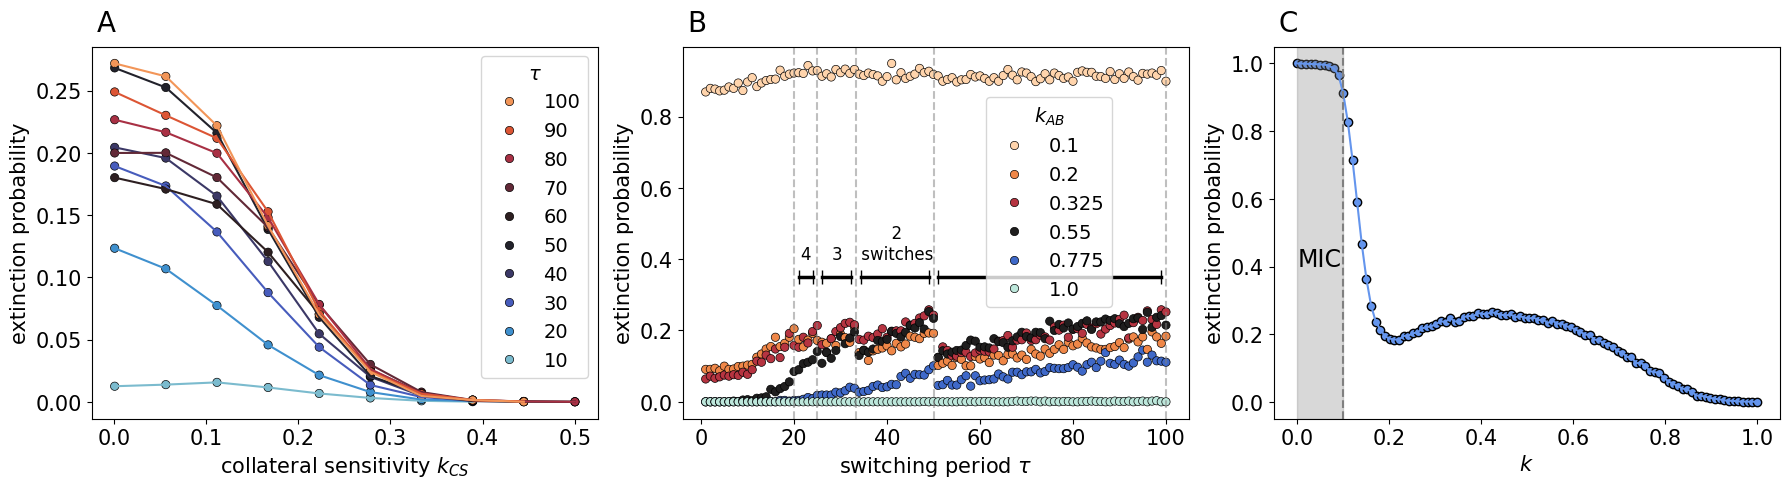

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


plt.subplot(1,3,1)

df = pd.read_csv('Parameters sensitivity/kCS/ext_rate_kcs.csv')

dfext = df[df['FinalTime'] < 150].groupby(['SeasonLength','CS']).count().reset_index()
dfext['ExtRate'] = dfext['Trajectory'] / 10000


orden = sorted(dfext['SeasonLength'].unique(), reverse=True)

colors = sns.color_palette('icefire_r',len(orden))
pltt = dict(zip(orden, colors))

sns.scatterplot(data=dfext, x='CS', y='ExtRate', hue='SeasonLength', palette=pltt, hue_order=orden,ec='black')
sns.lineplot(data=dfext, x='CS', y='ExtRate', hue='SeasonLength', palette=pltt, legend=False)

plt.legend(title=r'$\tau$',fontsize=14, title_fontsize=14)
plt.xlabel('collateral sensitivity '+r'$k_{CS}$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,3,2)

df = pd.read_csv('Parameters sensitivity/IC/ext_rate_ic.csv')
df = pd.concat([df, pd.read_csv('Parameters sensitivity/IC/ext_rate_ic02.csv')])
df['Dead'] = df['FinalTime'] < 150

dfext = df.groupby(['SeasonLength','IC','Dead']).count().reset_index()
dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 1000

sns.scatterplot(data=dfext, x='SeasonLength', y='ExtRate', hue='IC', palette='icefire_r', ec='black')


for i in range(1,6):
    plt.axvline(x=100/i,linestyle='--',color='gray',alpha=0.5)
    if i == 3 or i==4:
        #plt.text(100/i - 5,0.0,str(i)+' switches',rotation='vertical',fontsize=15)
        pass
        
#plt.text(75,0.4,'  1 \n switch',fontsize=12,ha='center')
plt.plot([51,99],[0.35,0.35],marker='|',color='black',linewidth=2.5,ms=10)

plt.text(83.3/2,0.4,'  2 \n switches',fontsize=12,ha='center')#,bbox=dict(facecolor='white', edgecolor='black'))
plt.plot([34.3,49],[0.35,0.35],marker='|',color='black',linewidth=2.5,ms=10)

plt.text((100/4 + 100/3)/2,0.4,'3',fontsize=12,ha='center')
plt.plot([100/4+1,100/3-1],[0.35,0.35],marker='|',color='black',linewidth=2.5,ms=10)
plt.text((100/4 + 100/5)/2,0.4,'4',fontsize=12,ha='center')
plt.plot([100/5+1,100/4-1],[0.35,0.35],marker='|',color='black',linewidth=2.5,ms=10)



plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='$k_{AB}$',fontsize=14,title_fontsize=14,loc=(0.6,0.3))

plt.subplot(1,3,3)

df = pd.read_csv('Parameters sensitivity/IC/IC_no_monotono.csv')

dfext = df[df['FinalTime'] < 150].groupby(['SeasonLength','IC']).count().reset_index()
dfext['ExtRate'] = dfext['Trajectory'] / 10000

plt.plot(dfext['IC'], dfext['ExtRate'],color='cornflowerblue')
plt.scatter(dfext['IC'], dfext['ExtRate'],color='cornflowerblue',ec='black')
plt.xlabel(r'$k$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Zona sombreada de 0 a 0.1 en gris claro
plt.axvspan(0, 0.1, color='gray', alpha=0.3)

# Línea vertical discontinua
plt.axvline(x=0.1, linestyle='--', color='gray')

# Añadir texto "MIC" encima del área sombreada
y_max = dfext['ExtRate'].max()
plt.text(0.05, 0.4, 'MIC', ha='center',fontsize=17)


axes = axes.flatten()
# Letras A, B, C, ...
letters = ['A','B','C','D','E','F']

for i, ax in enumerate(axes):
    # Agrega la letra en la esquina superior izquierda de cada subplot
    ax.text(
        0.01, 1.1, letters[i],                # posición relativa en el eje (0,0 es abajo izquierda)
        transform=ax.transAxes,                # usa coordenadas relativas al eje
        fontsize=20, va='top'
    )

plt.tight_layout()
#plt.savefig('Fig4-sensibilidad parametros.png',dpi=300)
plt.show()

**Extinction probability sensitivity to model parameters.**
(*A*) Collateral sensitivity (CS) is necessary for extinction. Extinction probabilities decrease as the parameter $k_{CS}$ increases, across a range of switching periods ($\tau$, shown in color).
(*B*) Increasing antibiotic concentration (lowering $k$) robustly leads to extinction, depending on the number of treatment cycles. We observe a threshold near the MIC beyond which most populations go extinct regardless of the switching period.
(*C*) Extinction probability as a function of antibiotic concentration for $\tau = 50$. Close to the MIC, every trajectory becomes extinct. For sub-inhibitory doses, there is an intermediate dose that maximises extinction.

# Fig S7

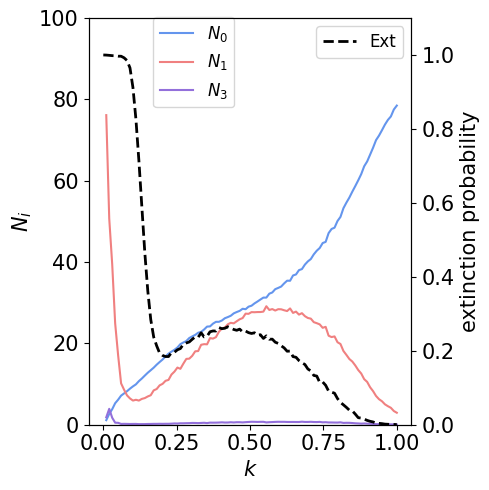

In [4]:
df = pd.read_csv('Parameters sensitivity/IC/IC_no_monotono.csv')
dft = pd.read_csv('Parameters sensitivity/IC/trajectories_no_monotono.csv')

df['Ext'] = df['FinalTime'] < 150.1
bins = [-float("inf"), 50, 100.1, 150, float("inf")]
labels = [0, 50, 100.1, 150]
df["Time"] = pd.cut(df["FinalTime"], bins=bins, labels=labels)
#df = df[(df['Time']!=0)&(df['Time']!=150)]
dft = pd.merge(dft, df, on=['SeasonLength','IC','Trajectory'],how='outer',suffixes=('','_'))
#dft = dft[dft['Ext']==True]
dft = dft.dropna()

dfext = df[df['Ext']==True].groupby(['IC','SeasonLength']).count().reset_index()
dfext['ExtRate'] = dfext['Ext']/10000

df1 = dft[dft['Time']==50].groupby(['IC']).mean(numeric_only=True).reset_index()
df2 = dft[dft['Time']==100.1].groupby(['IC']).mean(numeric_only=True).reset_index()
df3 = dft[dft['Time']==50].groupby(['IC']).mean(numeric_only=True).reset_index()

dfpop = df1[['IC','x1']].merge(df2[['IC','x2']],on=['IC'])
dfpop = dfpop.merge(df3[['IC','x3','x0']],on=['IC'])

fig, ax1 = plt.subplots(figsize=(5, 5))
ax2 = ax1.twinx()

ax1.plot(dfpop['IC'], dfpop['x0'], label='$N_0$', color='cornflowerblue')
ax1.plot(dfpop['IC'], dfpop['x1'], label='$N_1$', color='lightcoral')
#ax1.plot(dfpop['IC'], dfpop['x2'], label='x2', color='limegreen')
ax1.plot(dfpop['IC'], dfpop['x3'], label='$N_3$', color='mediumpurple')
    
ax2.plot(dfext['IC'],dfext['ExtRate'],linewidth=2,color='black',linestyle='--',label='Ext')

ax1.set_ylim(0,100)
ax1.legend(loc=(0.2,0.78),fontsize=12)
ax2.legend(loc='upper right',fontsize=12)
ax2.set_ylim(0,1.1)


ax1.set_xlabel(r"$k$", fontsize=15)
ax1.set_ylabel(r"$N_i$", fontsize=15)
ax2.set_ylabel("extinction probability", fontsize=15)
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
plt.tight_layout()
#plt.savefig('suppIC.png',dpi=300)
plt.show()

**Effect of changes in antibiotic concentration.** Mean population composition prior to the first switch (colored lines), superimposed with the extinction probability (black dashed line). As antibiotic inhibition increases ($k$ decreases), the population of $x_1$ goes up, which leads to an increase in extinction probability. After a certain antibiotic concentration (below $k\approx 0.7$), $x_0$ does not reach high values, and evolution to $x_1$ slows down. This leads to a decrease in extinction at intermediate to high antibiotic concentrations ($k < 0.4$ approximately). When antibiotic inhibition becomes very strong (i.e. $k<0.1$), the decrease in $x_0$ is so strong that populations become extinct not due to collateral senistivity, but because the overall carrying capacity is very low and extinctions occur from fluctuations. Simulations with $\tau=50$, $t_{\text{end}}=150$, $t_{\text{end treatment}}=100$, $\text{number of trajectories}=10000$.